In [1]:
import os
import sys

import pandas as pd
import numpy as np
import scipy.io

import matplotlib.pyplot as plt
from importlib import reload

sys.path.append('/home/feldheimlab/population-encoding-main')

from Experiment import *

In [2]:
wd = '/media/feldheimlab/Seagate Expansion Drive/processedL5/2023-02-03-0/data001,data002,data003,data004,data005,data006,data007,data008,data009,data010,data011/'

asdf = scipy.io.loadmat(wd + 'asdf.mat')['asdf_raw']
IDs = scipy.io.loadmat(wd + 'asdf.mat')['IDs']
location = scipy.io.loadmat(wd + 'asdf.mat')['location']
basicinfo  = scipy.io.loadmat(wd + 'basicinfo.mat')
eisummary = scipy.io.loadmat(wd + 'eisummary.mat')
xy = scipy.io.loadmat(wd + 'xy.mat')
datasets = np.concatenate([[0],np.squeeze(scipy.io.loadmat(wd + 'segmentlengths.mat')['segmentseparations'])])/1000
rise = np.squeeze(scipy.io.loadmat(wd + 'ttlTimes.mat')['ttlTimes'])/1000

In [3]:
wd2 = '/media/feldheimlab/Seagate Expansion Drive/processedL5/2023-01-30-0/data001,data002,data003,data004,data005,data006,data007,data008,data009,data010,data011/'

asdf2 = scipy.io.loadmat(wd + 'asdf.mat')['asdf_raw']
IDs2 = scipy.io.loadmat(wd + 'asdf.mat')['IDs']
location2 = scipy.io.loadmat(wd + 'asdf.mat')['location']
basicinfo2  = scipy.io.loadmat(wd + 'basicinfo.mat')
eisummary2 = scipy.io.loadmat(wd + 'eisummary.mat')
xy2 = scipy.io.loadmat(wd + 'xy.mat')
datasets2 = np.concatenate([[0],np.squeeze(scipy.io.loadmat(wd + 'segmentlengths.mat')['segmentseparations'])])/1000
rise2 = np.squeeze(scipy.io.loadmat(wd + 'ttlTimes.mat')['ttlTimes'])/1000

/media/feldheimlab/Seagate Expansion Drive/processedL5/2023-02-03-0/data001,data002,data003,data004,data005,data006,data007,data008,data009,data010,data011/
	Loading xy.mat with SciPy
Surface definition (SurfaceContour.mat) does not exist
	Loading xy.mat with SciPy
Surface definition (SurfaceContour.mat) does not exist
197/197 neurons are in the SC
	Loading AuditorySpotSummary_6.mat with SciPy
	Loading AuditorySpotSummary_6.mat with SciPy
	Loading AuditorySpotSummary_11.mat with SciPy
	Loading AuditorySpotSummary_11.mat with SciPy


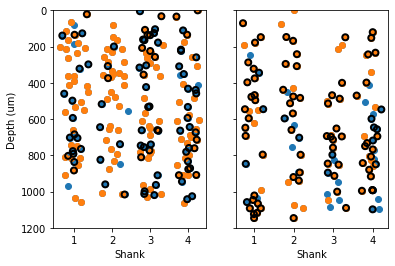

In [4]:

#load the data for each of the datsets
print(wd)
e = Experiment(wd) # load the experimental data
# e.resetUseIDs()
e2 = Experiment(wd2) # load the experimental data

fig, axs = plt.subplots(1,2)


print('{0}/{1} neurons are in the SC'.format(e.nNeu, e.nNeuTotal))
axs[0].scatter(e.y[e.useIDs], e.neurons['depth'][e.useIDs], label='neurons')
axs[1].scatter(e2.y[e2.useIDs], e2.neurons['depth'][e2.useIDs], label='neurons')

posneu1 = np.where(e2.loadData('AuditorySpotSummary_6.mat')['posneu'])[0]
posneu2 = np.where(e.loadData('AuditorySpotSummary_6.mat')['posneu'])[0]
posneu3 = np.where(e2.loadData('AuditorySpotSummary_11.mat')['posneu'])[0]
posneu4 = np.where(e.loadData('AuditorySpotSummary_11.mat')['posneu'])[0]

axs[0].scatter(e.y[posneu2], e.neurons['depth'][posneu2], label='posneu pre')
axs[0].scatter(e.y[posneu4], e.neurons['depth'][posneu4], label='posneu post', edgecolor='black', linewidth=2, facecolor='None')

axs[1].scatter(e2.y[posneu1], e2.neurons['depth'][posneu1], label='posneu pre')
axs[1].scatter(e2.y[posneu3], e2.neurons['depth'][posneu3], label='posneu post', edgecolor='black', linewidth=2, facecolor='None')
 

# e.removeWaveforms(5) #remove axon-like waveforms; class 5 waveforms
# print('{0}/{1} neurons are in the SC and have proper waveforms'.format(e.nNeu, e.nNeuTotal))
# plt.scatter(e.y[e.useIDs], e.neurons['depth'][e.useIDs], label='Non-axonal')

# compare useIDs and those that area visual responive
# e.getVisNeurons()
# vis_ids = keepsimlist(e.useIDs, e.sig_vis)
# print('{0}/{1} neurons are in the SC, have proper waveforms, and visually responsive'.format(len(vis_ids), e.nNeuTotal))
# plt.scatter(e.y[vis_ids], e.neurons['depth'][vis_ids], label='visual')

axs[0].set_ylim([1200,0])
axs[0].set_ylabel('Depth (um)')
axs[0].set_xlabel('Shank')
axs[0].set_xticks([0,200,400,600],[1,2,3,4])

axs[1].set_ylim([1200,0])
# axs[1].set_ylabel('Depth (um)')
axs[1].set_yticklabels([])
axs[1].set_xlabel('Shank')
axs[1].set_xticks([0,200,400,600],[1,2,3,4])

plt.show()

In [5]:
timerange = 1000
timeBinSz = 20

pat5 = e.loadData('AuditorySpotSummary_6.mat')['patterns_all']['fullpat'][0][0][0]
data_mat5 = patternToMatrix(pat5, timerange, timeBinSz, neuron_list=None, norm=False, count=True)

pat10 = e.loadData('AuditorySpotSummary_11.mat')['patterns_all']['fullpat'][0][0][0]
data_mat10 = patternToMatrix(pat10, timerange, timeBinSz, neuron_list=None, norm=False, count=True)

pat52 = e2.loadData('AuditorySpotSummary_6.mat')['patterns_all']['fullpat'][0][0][0]
data_mat52 = patternToMatrix(pat52, timerange, timeBinSz, neuron_list=None, norm=False, count=True)

pat102 = e2.loadData('AuditorySpotSummary_11.mat')['patterns_all']['fullpat'][0][0][0]
data_mat102 = patternToMatrix(pat102, timerange, timeBinSz, neuron_list=None, norm=False, count=True) 

	Loading AuditorySpotSummary_6.mat with SciPy
	Loading AuditorySpotSummary_11.mat with SciPy
	Loading AuditorySpotSummary_6.mat with SciPy
	Loading AuditorySpotSummary_11.mat with SciPy


(197, 1, 17, 120, 50)


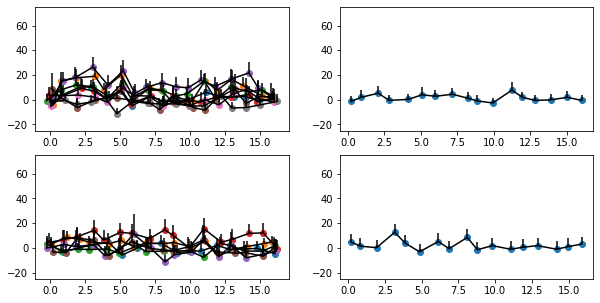

1 1
8 6
[]
[]


In [14]:
similar = np.arange(pat10.shape[-1])
print(data_mat5.shape)


azimuths = [-144, -126, -108, -90, -72, -54, -36, -18, 0, 18, 36, 54, 72, 90, 108, 126, 144]

n_tests = len(azimuths)
thresh = 10
BLNcolors= ['r','b']

r_transp = [0.5,  0,0.5,  0,0.5,1.0,0.5,0.5,  0,0.5,0.66,0.34,0.66,0.34,0.5]
b_transp = [  0,0.5,  0,0.5,0.5,  0,0.5,0.5,1.0,0.5,0.34,0.66,0.34,0.66,0.5]


fig, axs = plt.subplots(2,2, figsize=(10,5))    

PUPneuron2 = []
for sim in posneu2:
    base = np.mean(data_mat5[sim,0,:,:,-1:]/0.02)
    image = np.mean(data_mat5[sim,0,:,:,:1]/0.02, axis=(1,2))-base # axis =(1))
    der = np.diff(image)
    stdev = np.std(data_mat5[sim,0,:,:,:1]/0.02, axis=(1,2))
    if any(np.abs(der) > thresh):
        PUPneuron2.append(sim)
        xs = np.arange(n_tests)+np.random.random(n_tests)*0.5 - 0.25
        axs[0][0].errorbar(xs, image, yerr = [np.zeros_like(stdev), stdev/np.sqrt(30)] , c='k')
        axs[0][0].scatter(xs, image)

PUPneuron1 = []
for sim in posneu1:
    base = np.mean(data_mat52[sim,0,:,:,-1:]/0.02)
    image = np.mean(data_mat52[sim,0,:,:,:1]/0.02, axis=(1,2)) - base # axis =(1))
    der = np.diff(image)
    stdev = np.std(data_mat52[sim,0,:,:,:1]/0.02, axis=(1,2))
    if any(np.abs(der) > thresh):
        PUPneuron1.append(sim)
        xs = np.arange(n_tests)+np.random.random(n_tests)*0.5 - 0.25
        axs[0][1].errorbar(xs, image, yerr = [np.zeros_like(stdev), stdev/np.sqrt(30)] , c='k')
        axs[0][1].scatter(xs, image)
axs[0][0].set_ylim([-25,75])   
axs[0][1].set_ylim([-25,75])                    

PUPneuron4 = []
for sim in posneu4:
    base = np.mean(data_mat10[sim,0,:,:,-1:]/0.02)
    image = np.mean(data_mat10[sim,0,:,:,:1]/0.02, axis=(1,2)) - base # axis =(1))
    der = np.diff(image)
    stdev = np.std(data_mat10[sim,0,:,:,:1]/0.02, axis=(1,2))
    if any(np.abs(der) > thresh):
        PUPneuron4.append(sim)
        xs = np.arange(n_tests)+np.random.random(n_tests)*0.5 - 0.25
        axs[1][0].errorbar(xs, image, yerr = [np.zeros_like(stdev), stdev/np.sqrt(30)] , c='k')
        axs[1][0].scatter(xs, image)

PUPneuron3 = []        
for sim in posneu3:
    base = np.mean(data_mat102[sim,0,:,:,-1:]/0.02)
    image = np.mean(data_mat102[sim,0,:,:,:1]/0.02, axis=(1,2))-base # axis =(1))
    der = np.diff(image)
    stdev = np.std(data_mat102[sim,0,:,:,:1]/0.02, axis=(1,2))
    if any(np.abs(der) > thresh):
        PUPneuron3.append(sim)
        xs = np.arange(n_tests)+np.random.random(n_tests)*0.5 - 0.25
        axs[1][1].errorbar(xs, image, yerr = [np.zeros_like(stdev), stdev/np.sqrt(30)] , c='k')
        axs[1][1].scatter(xs, image)
        
axs[1][0].set_ylim([-25,75])   
axs[1][1].set_ylim([-25,75])                    
plt.show()

print(len(PUPneuron1), len(PUPneuron3))
print(len(PUPneuron2), len(PUPneuron4))

print(keepsimlist(PUPneuron1, PUPneuron3))
print(keepsimlist(PUPneuron2, PUPneuron4))

right-top, PUP positive:  118


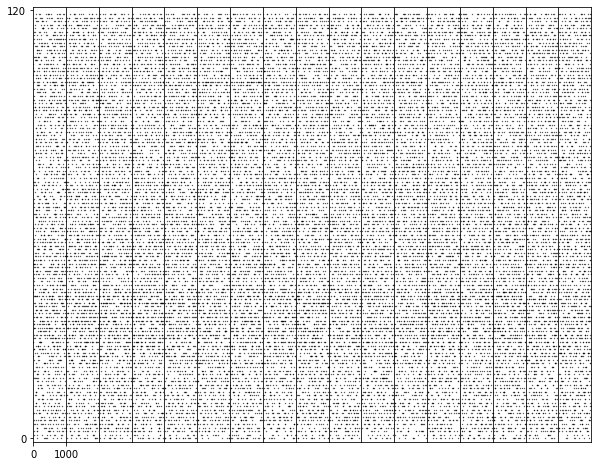

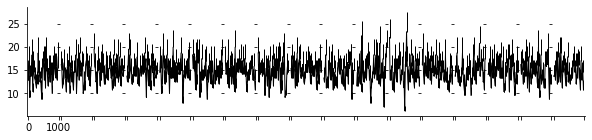

right-bottom, PUP positive:  44


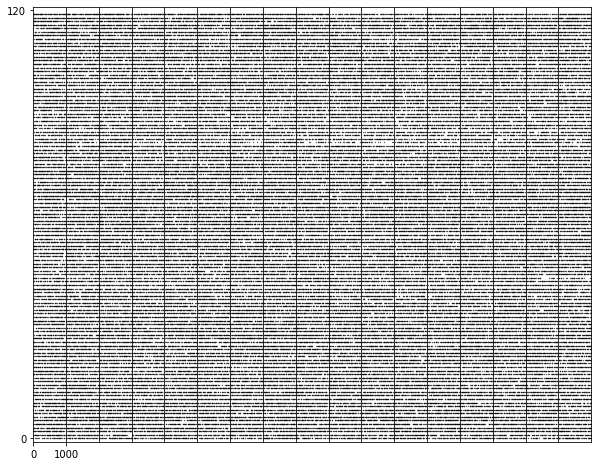

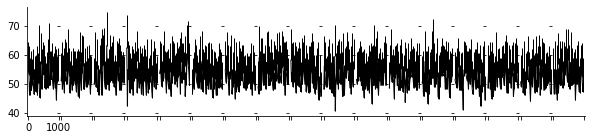

In [17]:
for sim in BLNneuron1:
    print('right-top, PUP positive: ', sim)
    PatternRaster(pat52[:,:,:,sim])
    nmean = np.mean(data_mat52[sim,0,:,:,:]/0.02, axis = 1)
    nsem = np.mean(data_mat52[sim,0,:,:,:]/0.02, axis = 1)/np.sqrt(30)
    fig, axs = plt.subplots(1,n_tests, figsize =(10,2), sharey=True)
    xs = np.arange(data_mat52.shape[-1])
    for i in range(n_tests):
        axs[i].errorbar(xs, nmean[i], yerr=[np.zeros_like(nsem[i]), nsem[i]], color='k', linewidth=1)
        if i != 0:
            axs[i].set_xticklabels([])
            axs[i].spines[['left','right', 'top']].set_visible(False)
        else:
            axs[i].spines[['right', 'top']].set_visible(False)
    axs[0].set_xticks([0, 50])
    axs[0].set_xticklabels([0, 1000])
    plt.subplots_adjust(wspace=0, hspace=0)  
    plt.show()
    

for sim in BLNneuron3:
    print('right-bottom, PUP positive: ', sim)
    PatternRaster(pat102[:,:,:,sim])
    nmean = np.mean(data_mat102[sim,0,:,:,:]/0.02, axis = 1)
    nsem = np.mean(data_mat102[sim,0,:,:,:]/0.02, axis = 1)/np.sqrt(30)
    fig, axs = plt.subplots(1,n_tests, figsize =(10,2), sharey=True)
    xs = np.arange(data_mat10.shape[-1])
    for i in range(n_tests):
        axs[i].errorbar(xs, nmean[i], yerr=[np.zeros_like(nsem[i]), nsem[i]], color='k', linewidth=1)
        if i != 0:
            axs[i].set_xticklabels([])
            axs[i].spines[['left','right', 'top']].set_visible(False)
        else:
            axs[i].spines[['right', 'top']].set_visible(False)
    axs[0].set_xticks([0, 50])
    axs[0].set_xticklabels([0, 1000])
    plt.subplots_adjust(wspace=0, hspace=0)  
    plt.show()
    

left-top, PUP positive:  4


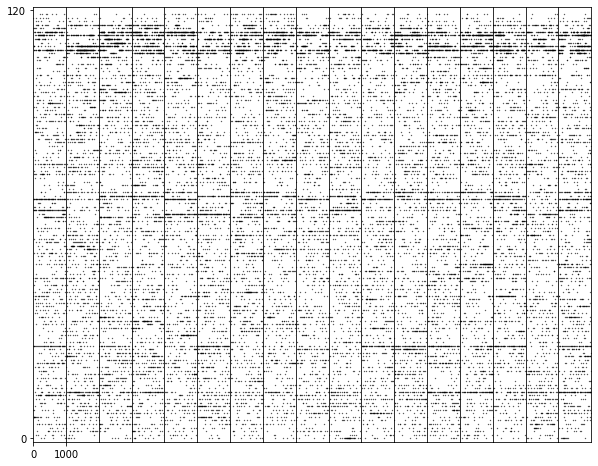

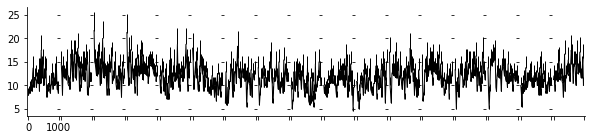

left-top, PUP positive:  7


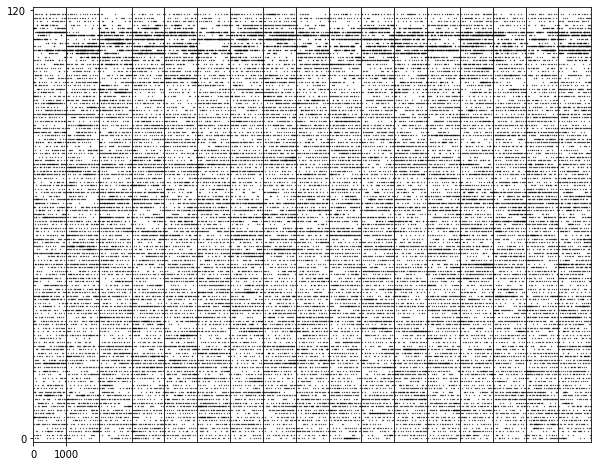

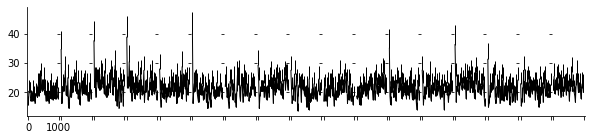

left-top, PUP positive:  9


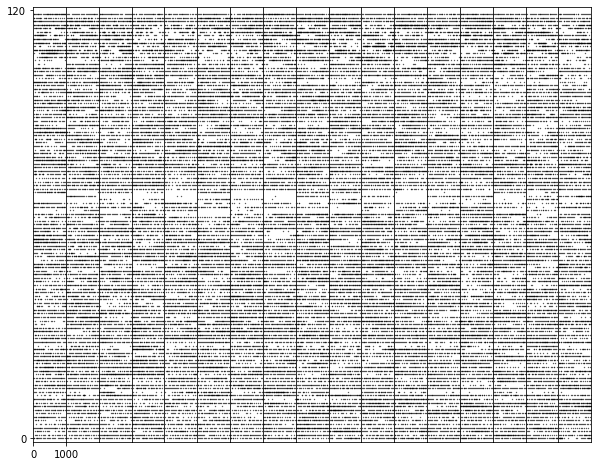

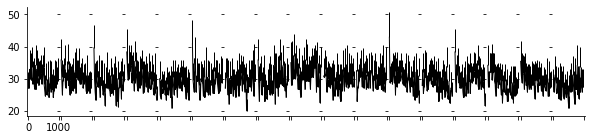

left-top, PUP positive:  38


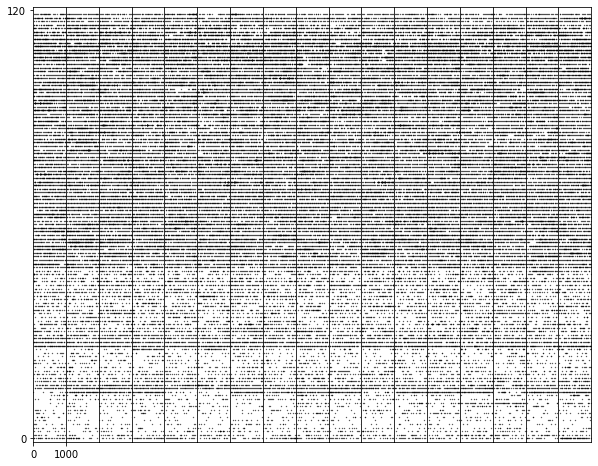

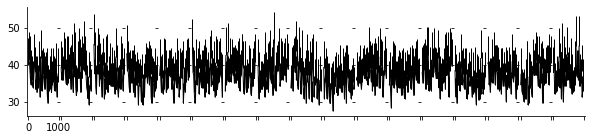

left-top, PUP positive:  108


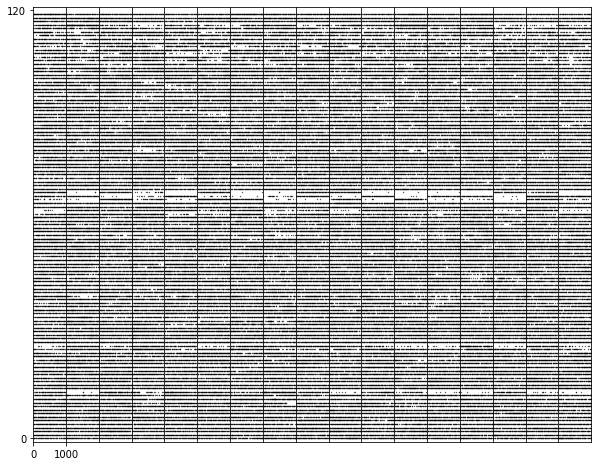

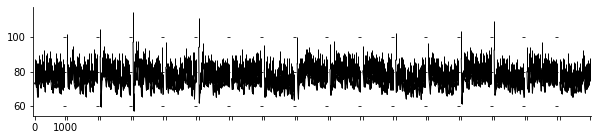

left-top, PUP positive:  156


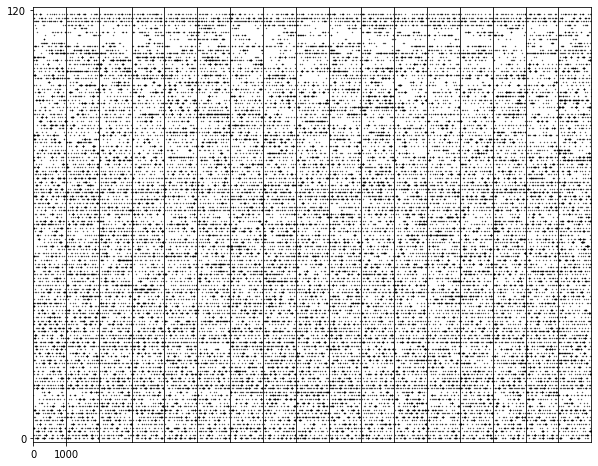

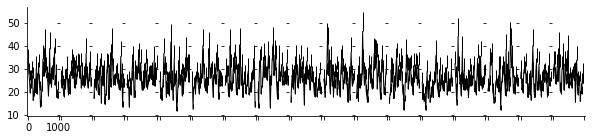

left-top, PUP positive:  168


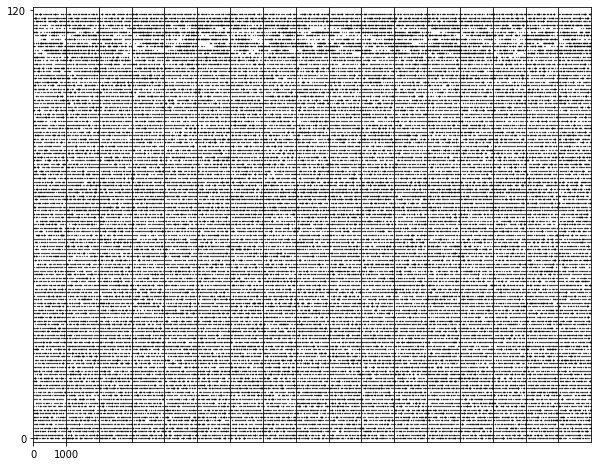

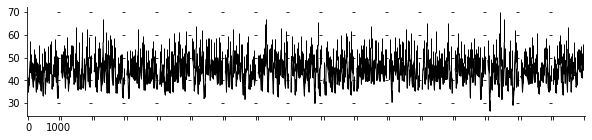

left-top, PUP positive:  171


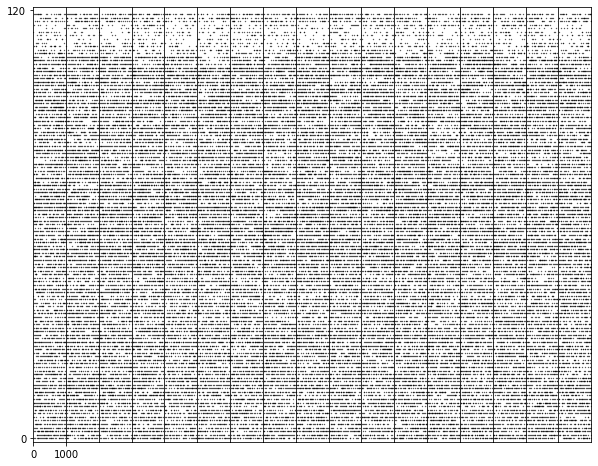

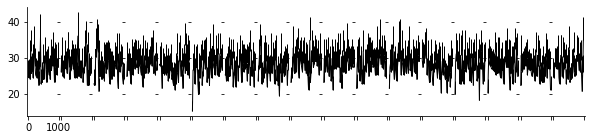

left-bottom, PUP positive:  97


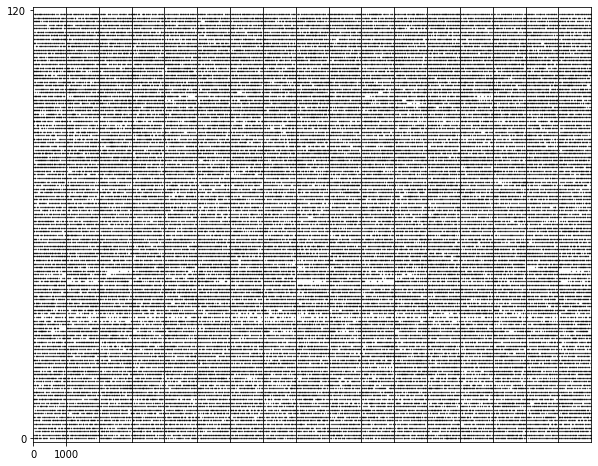

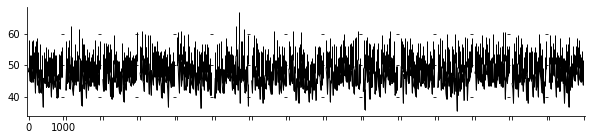

left-bottom, PUP positive:  102


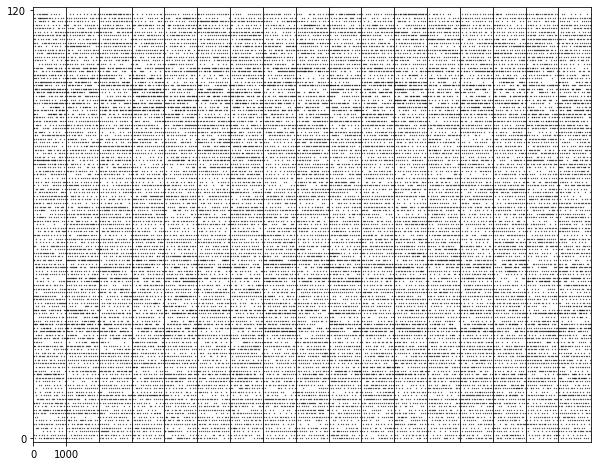

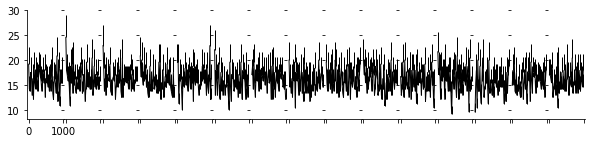

left-bottom, PUP positive:  113


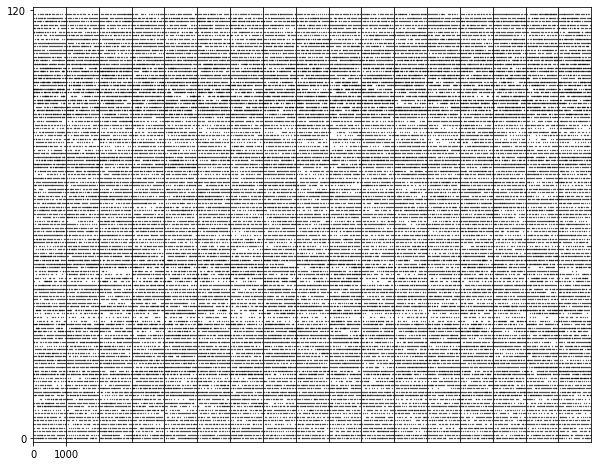

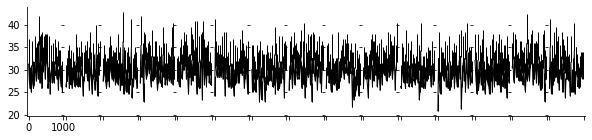

left-bottom, PUP positive:  140


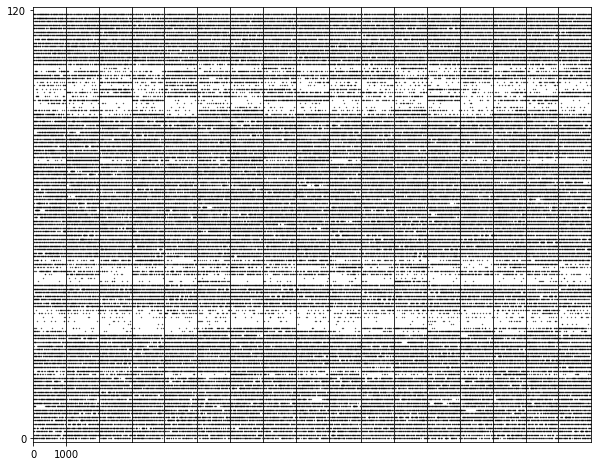

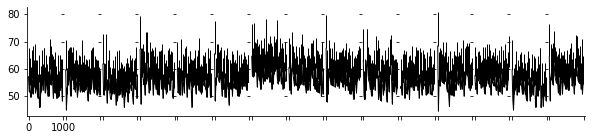

left-bottom, PUP positive:  151


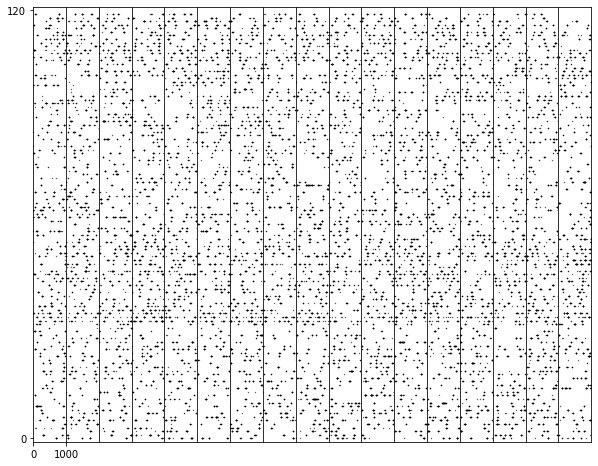

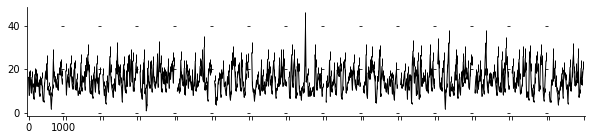

left-bottom, PUP positive:  166


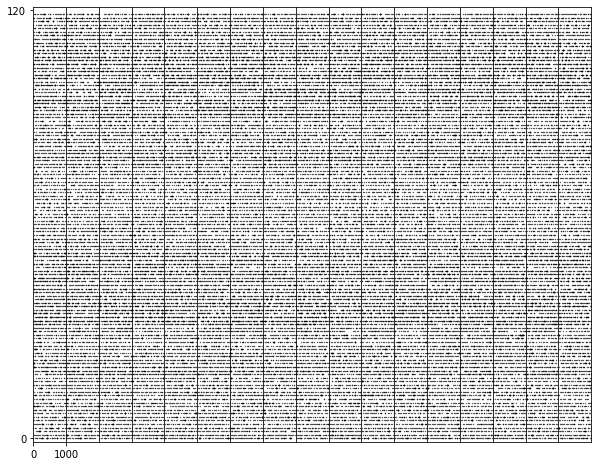

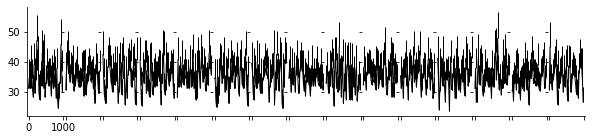

In [18]:
for sim in BLNneuron2:
    print('left-top, PUP positive: ', sim)
    PatternRaster(pat5[:,:,:,sim])
    nmean = np.mean(data_mat5[sim,0,:,:,:]/0.02, axis = 1)
    nsem = np.mean(data_mat5[sim,0,:,:,:]/0.02, axis = 1)/np.sqrt(30)
    fig, axs = plt.subplots(1,n_tests, figsize =(10,2), sharey=True)
    xs = np.arange(data_mat5.shape[-1])
    for i in range(n_tests):
        axs[i].errorbar(xs, nmean[i], yerr=[np.zeros_like(nsem[i]), nsem[i]], color='k', linewidth=1)
        if i != 0:
            axs[i].set_xticklabels([])
            axs[i].spines[['left','right', 'top']].set_visible(False)
        else:
            axs[i].spines[['right', 'top']].set_visible(False)
    axs[0].set_xticks([0, 50])
    axs[0].set_xticklabels([0, 1000])
    plt.subplots_adjust(wspace=0, hspace=0)  
    plt.show()
    
for sim in BLNneuron4:
    print('left-bottom, PUP positive: ', sim)
    PatternRaster(pat10[:,:,:,sim])
    nmean = np.mean(data_mat10[sim,0,:,:,:]/0.02, axis = 1)
    nsem = np.mean(data_mat10[sim,0,:,:,:]/0.02, axis = 1)/np.sqrt(30)
    fig, axs = plt.subplots(1,15, figsize =(10,2), sharey=True)
    xs = np.arange(data_mat10.shape[-1])
    for i in range(15):
        axs[i].errorbar(xs, nmean[i], yerr=[np.zeros_like(nsem[i]), nsem[i]], color='k', linewidth=1)
        if i != 0:
            axs[i].set_xticklabels([])
            axs[i].spines[['left','right', 'top']].set_visible(False)
        else:
            axs[i].spines[['right', 'top']].set_visible(False)
    axs[0].set_xticks([0, 50])
    axs[0].set_xticklabels([0, 1000])
    plt.subplots_adjust(wspace=0, hspace=0)  
    plt.show()